# Finding the Best Markets to Advertize In

This projects foucses on an an e-learning company that offers courses on programming.
The company is interdted to perform growth analysis, as part of product promoting. Most of the courses in the platform are on web and mobile development, but the comapny also have coutses in other fields, like data science, game development and more.
The goal in this project is to find the two best markets to advertise in.

We will explore two markets that have existing data:
1 -  freeCodeCamp's 2017 New Coder Survey (taken 
This data is based on the freeCodeCamp free e-learning platform, that offers courses on web development but also other fields, which suits the purpose of this analysis.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [44]:
fc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
# First look at the dataframe
print(fc.shape)
pd.options.display.max_columns = 150
fc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

We will focus on a population of new coders that answered the survey.
For this analysis, we have 3 main questions:

1- Where are the new coders located?

2- What are the leading locations?

3- How much money are they willing to spend on e-learning?

## Checking for Sample Representativity


The first step is checking whether the data fits our students and can serve as a good sample

The JobRoleInterest column describes the role the new coders are interested in.






In [45]:
JobRoleInterest_frequnecy_table = fc['JobRoleInterest'].value_counts(normalize = True) * 100

        
print(JobRoleInterest_frequnecy_table)
    

Full-Stack Web Developer                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                                       2.030892
  Mobile Developer                                                                                                                                                                           1.673341
Game Devel

As shown in the table above, most new coders with to learn web development.
Only 2.17% are intersted exclusively in data science, 0.75% are interested exclusively in becoming data engineers.
However, the survey allows the participants to choose more than one interest. In fact, most of the participtans chose 2 intersts or more.
To get a better picture of the number of people intersted in spesific domains, some data manipulation is required.

A frequency table of the number of option each participant chose can help clarify the variety.


In [46]:
# Split each string, that represents an interest, in the 'JobRoleInterest' column
interests_without_nulls = fc['JobRoleInterest'].dropna()
interests_splitted = interests_without_nulls.str.split(',')


# Frequency table for the number of options in the 'JobRoleInterest' column 
no_interests_options = interests_splitted.apply(lambda arr: len(arr))
ft_interests_options = no_interests_options.value_counts(normalize = True).sort_index() * 100
print(ft_interests_options)

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64


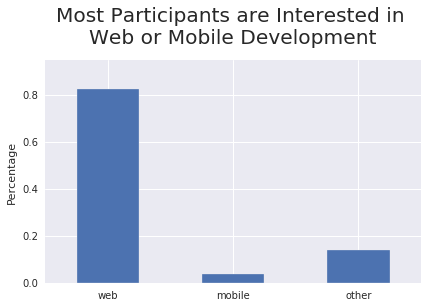

In [47]:
# # Frequency table of interests
web_or_mobile_dev = interests_without_nulls.str.contains(
    'Web Developer| Mobile Developer')
ft_web_or_mobile_dev = web_or_mobile_dev.value_counts(normalize = True) * 100


fields = {'web': 0, "mobile": 0, 'other': 0}
for i in interests_without_nulls:
    if 'Web Developer' in i:
        fields['web'] +=1
    elif 'Mobile Developer' in i:
        fields['mobile'] +=1
    else:
        fields['other'] +=1

df = pd.DataFrame.from_dict(fields, orient='index').apply(lambda x: x/x.sum(), axis=0)
ax = df.plot(kind='bar', rot=0, ylim=(0, 0.95))
plt.style.use('fivethirtyeight')
ax.set_ylabel('Percentage')
ax.get_legend().remove()
plt.title('Most Participants are Interested in \nWeb or Mobile Development', y = 1.05)
plt.show()




Only 31% of the coders picked 1 interest, while the majority (>52%) picked 2 or more, meaning they are not completely sure in which field they wish to focus on yet.

However, our main products for advertising are web and mobile development courses. Most of the coders (86.2%) are intersted in either web or mobile development. Only 13.7% of the partocipants choose other fields.

**This implies that this dataset is representative for our population.
We wish to advertise our main products (web and mobile development online courses), but also other domains of studies.**




## Analyzing the sample

For better targeting our auedience for advertisment, locations and number of potential customers are important.

In [48]:
#drop null values in the JobRoleInterest column for a more representative sample
print(fc['JobRoleInterest'].notnull().sum())

fc_no_nulls = fc[fc['JobRoleInterest'].notnull()].copy()

fc_no_nulls['JobRoleInterest'].describe()



6992


count                         6992
unique                        3213
top       Full-Stack Web Developer
freq                           823
Name: JobRoleInterest, dtype: object

The 'CountryLive' variable describes what country each participant currently lives in.

In [67]:
#Absoulute frequencies
abs_ft = fc_no_nulls['CountryLive'].value_counts(dropna=False)
#Relative frequencies
rel_ft = fc_no_nulls['CountryLive'].value_counts(normalize=True, dropna=False)*100

#Table of both frequencies
pd.DataFrame(data = {'Absolute frequency': abs_ft, 
                     'Percentage': rel_ft})

,Absolute frequency,Percentage
United States of America,2933,47.215068
India,463,7.453316
United Kingdom,279,4.491307
Canada,240,3.863490
Poland,122,1.963941
Germany,114,1.835158
Brazil,111,1.786864
Australia,102,1.641983
Ukraine,79,1.271732
Russia,79,1.271732


There are no nulls valus in the 'CountyLive' column. Almost half (44.7%) of the coders are currently living in the USA. The next largest geographical group is from India (7.5%). In the 3rd place with 4.5% are coders from the UK. Canada is in the 4th place, with 3.7%

Based on this data, it is reccommended to advertise in the USA and India
However, these two markets are very different from each other, and the potential revenue from each is probably not similar.

## Exploring the market with higher potential for profitability

The company's product is a paid product, hence we wish to consider with of the countries have users that are more wiiling to pay for their on-line courses.
The 'MoneyForLearning' column describes the amount of US dollars spent by the survey participants, from the moment they started coding until the moment they completed the survey.
It is important to note that a monthly subscription costs $59.

In [68]:
fc_no_nulls['MonthsProgramming'].describe()
fc_no_nulls['MoneyForLearning'].describe()

#Remove zeros to avoid division by 0
fc_no_nulls['MonthsProgramming'].replace(0, 1, inplace=True)
#Calculate money spent per month
fc_no_nulls['payment_per_month'] = fc_no_nulls['MoneyForLearning'] / fc_no_nulls['MonthsProgramming']
#Explore results of money spent per month
fc_no_nulls['payment_per_month'].describe()
fc_no_nulls['payment_per_month'].isnull().sum()

#remove rows with null values
fc_no_nulls = fc_no_nulls[fc_no_nulls['payment_per_month'].notnull()]



In [69]:
#remove null values from the 'CountryLive' column
fc_no_nulls['CountryLive'].isnull().sum()
fc_no_nulls = fc_no_nulls[fc_no_nulls['CountryLive'].notnull()]

#Explore amount of data left
fc_no_nulls['CountryLive'].value_counts().head(4).sum()

dataLeft = fc['CountryLive'].value_counts().head(4).sum()
dataDeleted = fc_no_nulls['CountryLive'].value_counts().head(4).sum()
print((dataDeleted/dataLeft)*100)                  
    

45.714619336758524


The final sample contains 3,915 participants (out of 8,564 , total of 45.7%)

## Money spent each monyh by country

The four most ingaged countries are: US, India, UK and Canada.

In [70]:
#group by each country
fc_grouped_by_country = fc_no_nulls.groupby('CountryLive').agg([np.min, np.max, np.mean, np.median])
fc_grouped_by_country['payment_per_month'].loc[['United States of America','India', 'United Kingdom','Canada']]



,amin,amax,mean,median
CountryLive,,,,
United States of America,0.0,80000.0,227.997996,3.333333
India,0.0,10000.0,135.100982,0.000000
United Kingdom,0.0,1400.0,45.534443,0.000000
Canada,0.0,5000.0,113.510961,0.000000


These results raise two important thoughs:

1 - According to the mean, UK and Canada users spent much less compared to users from India. We should check for outliers that might affect the mean, and also check that the sample size is not too small and not representative. The median indeed implies there are outliers.

2 - There are countries in which the average payment per months is much higher than the countires we chose to analyze. Even thought, they will not be considered due to a small sample size.



/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



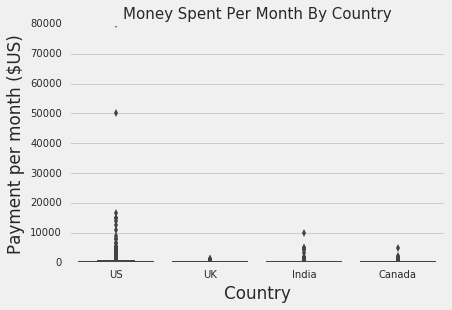

In [74]:
#plot to spot outliers
fc_4_countries = fc_no_nulls[fc_no_nulls['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(x = 'CountryLive', y ='payment_per_month', data =fc_4_countries)
plt.title('Money Spent Per Month By Country',
         fontsize = 15)
plt.ylabel('Payment per month ($US)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

Since the company has a total of 120 online courses, and each costs 59$, the maximun amount a user can spent per month is 7,080$. Hence, all values above this price are inccorect and shall be removed.

In [86]:
#remove participants who spend less than 10000 per month
fc_no_nulls = fc_no_nulls[fc_no_nulls['payment_per_month'] < 10001]
fc_no_nulls['payment_per_month'].describe()

count    6196.000000
mean      120.128149
std       521.173389
min         0.000000
25%         0.000000
50%         0.666667
75%        33.333333
max      9000.000000
Name: payment_per_month, dtype: float64

In [109]:
#2nd exploration of the data, after cleaning the outliers
fc_grouped_by_country_clean = fc_4_countries_clean.groupby('CountryLive').agg([np.min, np.max, np.mean, np.median])
print('\nCleaned descriptive of money spent per month by country')
fc_grouped_by_country_clean['payment_per_month'].loc[['United States of America','India', 'United Kingdom','Canada']]



Cleaned descriptive of money spent per month by country


,amin,amax,mean,median
CountryLive,,,,
United States of America,0.0,6666.666667,144.888094,3.333333
India,0.0,5000.000000,113.748387,0.000000
United Kingdom,0.0,1400.000000,45.534443,0.000000
Canada,0.0,5000.000000,113.510961,0.000000



Cleaned plot of money spent per month by country


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



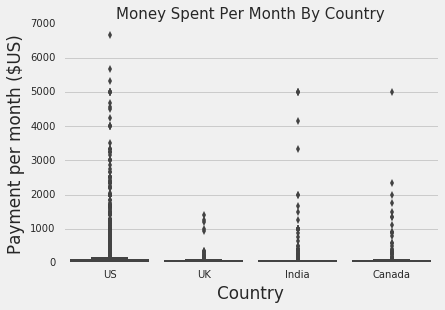

In [113]:
#2nd plot

print('\nCleaned plot of money spent per month by country')

sns.boxplot(x = 'CountryLive', y ='payment_per_month', data =fc_4_countries_clean)
plt.title('Money Spent Per Month By Country',
         fontsize = 15)
plt.ylabel('Payment per month ($US)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

As seen in the boxplot, there are still outliers in each country.


In [114]:
#Exploring outliers in India
india_outliers = fc_4_countries_clean[
 (fc_4_countries_clean['CountryLive'] == 'India') & 
    (fc_4_countries_clean['payment_per_month'] > 3000)]
print(india_outliers)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728   24.0               0.0             NaN                NaN          NaN   
1755   20.0               0.0             NaN                NaN          NaN   
7989   28.0               0.0             NaN                NaN          NaN   
8126   22.0               0.0             NaN                NaN          NaN   
15587  27.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  ChildrenNumber                 CityPopulation  \
1728                 NaN             NaN  between 100,000 and 1 million   
1755                 NaN             NaN            more than 1 million   
7989                 NaN             NaN  between 100,000 and 1 million   
8126                 NaN             NaN            more than 1 million   
15587                NaN             NaN            more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFC

There are 5 users from India who spent over 3000$. They did not attend any bootcamps or unusual amount of code events. Assuming these are mistakes in the input, these rows will be deleted.





In [115]:
# Remove outliers for India
fc_4_countries_clean = fc_4_countries_clean.drop(india_outliers.index)

In [116]:
#Exploring outliers in the US
us_outliers = fc_4_countries_clean[
 (fc_4_countries_clean['CountryLive'] == 'United States of America') & 
    (fc_4_countries_clean['payment_per_month'] > 6000)]
print(us_outliers)


       Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
7505  26.0               1.0             0.0                1.0       Codeup   

      BootcampRecommend  ChildrenNumber       CityPopulation  \
7505                0.0             NaN  more than 1 million   

      CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
7505                   NaN                   NaN           NaN   

      CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
7505               NaN               NaN                  NaN   

      CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
7505              NaN                  NaN            NaN            NaN   

      CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  \
7505                   NaN                  NaN                   1.0   

      CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops  \
7505                    NaN                 NaN                 NaN   

   

There are 5 users from the US who spent over 6000$. All of them, however, attended bootcamps. This can explain the amount of money spent on learning (the question in the original survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars? ")

However, the data shows that four of these users had been programming for 3 months or less. All bootcamps are atleast 3 months, so they most likely did not completed the bootcamp yet, therefor the amount of money spent per month is not representative for our purposes. 



In [120]:
#remove users that had been programming for 2 months or less in the US
us_users_2_months = fc_4_countries_clean[
    (fc_4_countries_clean['CountryLive'] == 'United States of America') & 
    (fc_4_countries_clean['payment_per_month'] > 6000) &
    (fc_4_countries_clean['MonthsProgramming'] < 3)
]

fc_4_countries_clean = fc_4_countries_clean.drop(us_users_2_months.index)

In [128]:
#3rd exploration of the data, after cleaning the outliers from the US
fc_grouped_by_country_clean = fc_4_countries_clean.groupby('CountryLive').agg([np.min, np.max, np.mean, np.median])
print('\nCleaned descriptive of money spent per month by country')
fc_grouped_by_country_clean['payment_per_month'].loc[['United States of America','India', 'United Kingdom','Canada']]




Cleaned descriptive of money spent per month by country


,amin,amax,mean,median
CountryLive,,,,
United States of America,0.0,6666.666667,144.888094,3.333333
India,0.0,2000.000000,65.758763,0.000000
United Kingdom,0.0,1400.000000,45.534443,0.000000
Canada,0.0,5000.000000,113.510961,0.000000



Cleaned plot of money spent per month by country


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



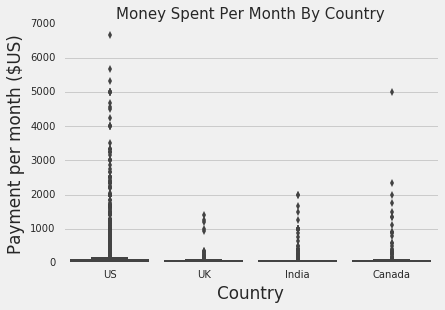

In [127]:
#3rd plot
print('\nCleaned plot of money spent per month by country')

sns.boxplot(x = 'CountryLive', y ='payment_per_month', data =fc_4_countries_clean)
plt.title('Money Spent Per Month By Country',
         fontsize = 15)
plt.ylabel('Payment per month ($US)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

In [129]:
#Exploring outliers in Canada
canada_outliers = fc_4_countries_clean[
 (fc_4_countries_clean['CountryLive'] == 'Canada') & 
    (fc_4_countries_clean['payment_per_month'] > 3000)]
print(canada_outliers)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
13659  24.0               1.0             0.0                0.0      Bloc.io   

       BootcampRecommend  ChildrenNumber       CityPopulation  \
13659                1.0             NaN  more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
13659                   1.0                   NaN           1.0   

       CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
13659               NaN               NaN                  NaN   

       CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
13659              1.0                  NaN            NaN            NaN   

       CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  \
13659                   NaN                  NaN                   NaN   

       CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops  \
13659                    NaN                 NaN              

Only one user in Canada has been programming for less than 3 months, and will also the amount of money spent per month is not representative for our purpos be removed from the sample.



In [130]:
#remove users that had been programming for 2 months or less in Canada
canada_users_2_months = fc_4_countries_clean[
    (fc_4_countries_clean['CountryLive'] == 'Canada') & 
    (fc_4_countries_clean['payment_per_month'] > 3000) &
    (fc_4_countries_clean['MonthsProgramming'] < 3)
]

fc_4_countries_clean = fc_4_countries_clean.drop(canada_users_2_months.index)

In [131]:
#4th exploration of the data, after cleaning the outliers from Canada
fc_grouped_by_country_clean = fc_4_countries_clean.groupby('CountryLive').agg([np.min, np.max, np.mean, np.median])
print('\nCleaned descriptive of money spent per month by country')
fc_grouped_by_country_clean['payment_per_month'].loc[['United States of America','India', 'United Kingdom','Canada']]




Cleaned descriptive of money spent per month by country


,amin,amax,mean,median
CountryLive,,,,
United States of America,0.0,6666.666667,144.888094,3.333333
India,0.0,2000.000000,65.758763,0.000000
United Kingdom,0.0,1400.000000,45.534443,0.000000
Canada,0.0,2337.166667,93.065400,0.000000



Cleaned plot of money spent per month by country


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



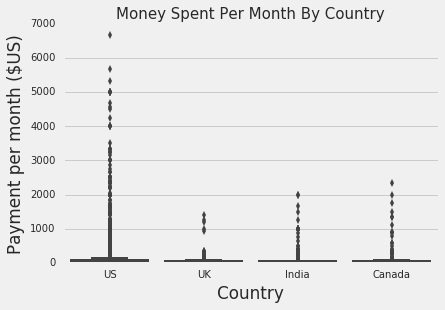

In [132]:
#4th plot
print('\nCleaned plot of money spent per month by country')

sns.boxplot(x = 'CountryLive', y ='payment_per_month', data =fc_4_countries_clean)
plt.title('Money Spent Per Month By Country',
         fontsize = 15)
plt.ylabel('Payment per month ($US)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

## Check for population per country


In [134]:
fc_4_countries_clean['CountryLive'].value_counts(normalize = True) * 100


United States of America    74.974333
India                       11.729979
United Kingdom               7.161191
Canada                       6.134497
Name: CountryLive, dtype: float64

## Conclusion

According to plot above, the two countries with highest mean of money spent  per month (as reported by the coders) are the US and Canada.
The US however has highest amount of money per month (144$ vs 93$ in Canada), therefore the US will be the first choice as a potential market for the company's products. The difference between the US and Canada should be taken under consideration when designing the advertisment budjet between the two countries.

Since the price for a course is 59$, and the UK users seem to spend 45$ per month on average, this is not the preferable choice for advertising.

Users in India, however, seem to spent on average 66$ - amount that fits our pricing. India has also more potential coders (almost twice as much compared to Canada.

We suggest a limited pilot with two options:

1 - Advertize in the US, India and Canada with customized budjet for each country. US should get more than 50 percent of the budjet. Limit this pilot for 6 months, and then collect the result and ROI.

2 - Advertize in the US and only one country in addition: Canada or India.
We should probably check that users from India feel comfortable with English, to assure our product fits their needs.
